In [3]:
%load_ext autoreload
%autoreload 2

# Imports

## Standard imports

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

## Lattice imports

In [5]:
from collections import OrderedDict
from gridsearch import experiment, load_experiment

# Create NARMA dataset

In [6]:
from dataset import NARMA

u_train, y_train = NARMA(sample_len = 2000)
u_test, y_test = NARMA(sample_len = 3000)
dataset = [u_train, y_train, u_test, y_test]

# Waxman graph generation

In [1]:
from matrix import waxman
from plot import scatter_3d

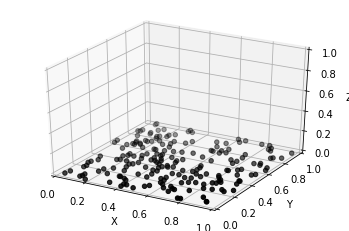

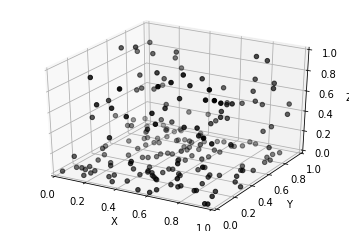

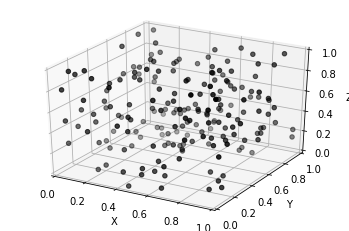

In [2]:
for z_frac in [0.0, 0.5, 1.0]:
    G = waxman(n=200, alpha=1.0, beta=1.0, z_frac=z_frac)
    scatter_3d(G)

# Lattice/tiling experiments (sq, rect, hex, tri)

## Lattice NRMSE

In [30]:
from metric import esn_topology

params = OrderedDict()
params['dataset'] = [dataset]
params['hidden_nodes'] = [9, 16, 25, 36, 49, 64, 81]
params['w_res_type'] = ['tetragonal', 'hexagonal', 'triangular']
nrmse_df = experiment(esn_topology, params)
nrmse_df.to_pickle('experiments/lattice_nrmse.pkl')

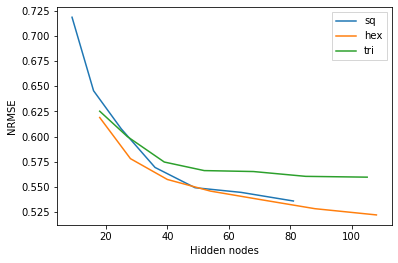

In [7]:
if 'nrmse_df' not in locals():
    nrmse_df = load_experiment('experiments/lattice_nrmse.pkl')

grouped_df = nrmse_df.groupby(['hidden_nodes', 'w_res_type']).mean().reset_index()

tetragonal = grouped_df.loc[grouped_df['w_res_type'] == 'tetragonal']
hexagonal = grouped_df.loc[grouped_df['w_res_type'] == 'hexagonal']
triangular = grouped_df.loc[grouped_df['w_res_type'] == 'triangular']

plt.plot(tetragonal['hidden_nodes'], tetragonal['esn_topology'], label='sq')
plt.plot(hexagonal['hidden_nodes'], hexagonal['esn_topology'], label='hex')
plt.plot(triangular['hidden_nodes'], triangular['esn_topology'], label='tri')

plt.legend(fancybox=False, loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.ylabel('NRMSE')
plt.xlabel('Hidden nodes')

plt.show()

## Lattice STM

In [10]:
from metric import esn_topology_mc

params = OrderedDict()
params['hidden_nodes'] = [9, 16, 25, 36, 49, 64, 81]
params['w_res_type'] = ['tetragonal', 'hexagonal', 'triangular']
mc_df = experiment(esn_topology_mc, params)
mc_df.to_pickle('experiments/lattice_mc.pkl')

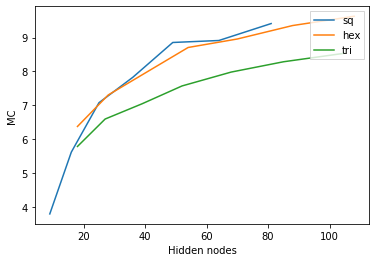

In [8]:
if 'mc_df' not in locals():
    mc_df = load_experiment('experiments/lattice_mc.pkl')

grouped_df = mc_df.groupby(['hidden_nodes', 'w_res_type']).mean().reset_index()

tetragonal = grouped_df.loc[grouped_df['w_res_type'] == 'tetragonal']
hexagonal = grouped_df.loc[grouped_df['w_res_type'] == 'hexagonal']
triangular = grouped_df.loc[grouped_df['w_res_type'] == 'triangular']

plt.plot(tetragonal['hidden_nodes'], tetragonal['esn_topology_mc'], label='sq')
plt.plot(hexagonal['hidden_nodes'], hexagonal['esn_topology_mc'], label='hex')
plt.plot(triangular['hidden_nodes'], triangular['esn_topology_mc'], label='tri')

plt.legend(fancybox=False, loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.ylabel('MC')
plt.xlabel('Hidden nodes')

plt.show()

## Lattice input scaling

In [9]:
from metric import esn_topology_input_scaling_mc

params = OrderedDict()
params['hidden_nodes'] = [25, 36, 49, 64, 81]
params['input_scaling'] = np.arange(0.1, 2.1, 0.1)
params['w_res_type'] = ['tetragonal', 'hexagonal', 'triangular']
is_df = experiment(esn_topology_input_scaling_mc, params)
is_df.to_pickle('experiments/lattice_input_scaling.pkl')

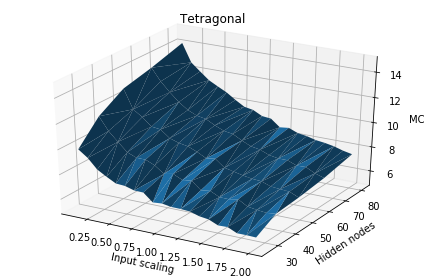

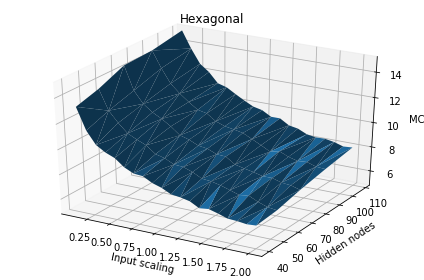

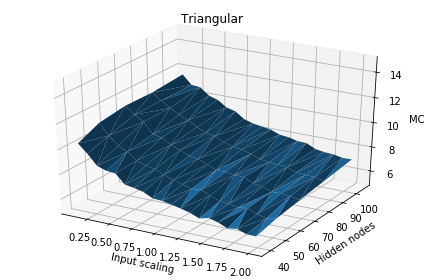

In [40]:
from plot import plot_trisurf

if 'is_df' not in locals():
    is_df = load_experiment('experiments/lattice_input_scaling.pkl')

grouped_df = is_df.groupby(['hidden_nodes', 'input_scaling', 'w_res_type']).mean().reset_index()

tetragonal = grouped_df.loc[grouped_df['w_res_type'] == 'tetragonal']
hexagonal = grouped_df.loc[grouped_df['w_res_type'] == 'hexagonal']
triangular = grouped_df.loc[grouped_df['w_res_type'] == 'triangular']

labels = {
    'x': 'Input scaling',
    'y': 'Hidden nodes',
    'z': 'MC'
}

data = {
    'x': tetragonal['input_scaling'],
    'y': tetragonal['hidden_nodes'],
    'z': tetragonal['esn_topology_input_scaling_mc']
}

plot_trisurf(data, labels, title='Tetragonal', zlim=[5, 15])

data = {
    'x': hexagonal['input_scaling'],
    'y': hexagonal['hidden_nodes'],
    'z': hexagonal['esn_topology_input_scaling_mc']
}

plot_trisurf(data, labels, title='Hexagonal', zlim=[5, 15])

data = {
    'x': triangular['input_scaling'],
    'y': triangular['hidden_nodes'],
    'z': triangular['esn_topology_input_scaling_mc']
}

plot_trisurf(data, labels, title='Triangular', zlim=[5, 15])

## Periodic lattice

In [12]:
from metric import esn_topology_periodic

params = OrderedDict()
params['hidden_nodes'] = [25, 36, 49, 64, 81]
params['periodic'] = [True, False]
params['w_res_type'] = ['tetragonal', 'hexagonal', 'triangular']
periodic_df = experiment(esn_topology_periodic, params)
periodic_df.to_pickle('experiments/periodic_lattice.pkl')

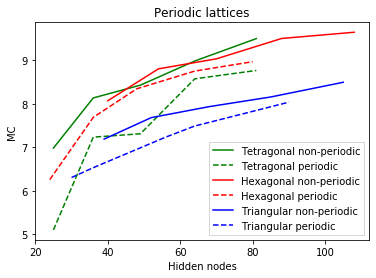

In [32]:
if 'periodic_df' not in locals():
    periodic_df = load_experiment('experiments/periodic_lattice.pkl')

grouped_df = periodic_df.groupby(['hidden_nodes', 'periodic', 'w_res_type']).mean().reset_index()

tetragonal = grouped_df.loc[(grouped_df['w_res_type'] == 'tetragonal') & (grouped_df['periodic'] == False)]
tetragonal_periodic = grouped_df.loc[(grouped_df['w_res_type'] == 'tetragonal') & (grouped_df['periodic'] == True)]

hexagonal = grouped_df.loc[(grouped_df['w_res_type'] == 'hexagonal') & (grouped_df['periodic'] == False)]
hexagonal_periodic = grouped_df.loc[(grouped_df['w_res_type'] == 'hexagonal') & (grouped_df['periodic'] == True)]

triangular = grouped_df.loc[(grouped_df['w_res_type'] == 'triangular') & (grouped_df['periodic'] == False)]
triangular_periodic = grouped_df.loc[(grouped_df['w_res_type'] == 'triangular') & (grouped_df['periodic'] == True)]

plt.title('Periodic lattices')
plt.ylabel('MC')
plt.xlabel('Hidden nodes')

plt.plot(tetragonal['hidden_nodes'], tetragonal['esn_topology_periodic'], label='Tetragonal non-periodic', color='green')
plt.plot(tetragonal_periodic['hidden_nodes'], tetragonal_periodic['esn_topology_periodic'], label='Tetragonal periodic', linestyle='--', color='green')

plt.plot(hexagonal['hidden_nodes'], hexagonal['esn_topology_periodic'], label='Hexagonal non-periodic', color='red')
plt.plot(hexagonal_periodic['hidden_nodes'], hexagonal_periodic['esn_topology_periodic'], label='Hexagonal periodic', linestyle='--', color='red')

plt.plot(triangular['hidden_nodes'], triangular['esn_topology_periodic'], label='Triangular non-periodic', color='blue')
plt.plot(triangular_periodic['hidden_nodes'], triangular_periodic['esn_topology_periodic'], label='Triangular periodic', linestyle='--', color='blue')

plt.legend(fancybox=False, loc='lower right', bbox_to_anchor=(1.0, 0.0))

plt.show()